# Preface

## Please do **NOT** run any cells as everything (all final images, graphs, etc. are preloaded)

In [1]:
%pip install colorcet
%pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import scipy.stats as st
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler as sc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, KFold, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics

from tqdm import tqdm

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scikitplot as skplt
from matplotlib import mlab
import seaborn as sns; sns.set_theme(color_codes=True)
import colorcet as cc

# Methods & DIsclosures

For the remainder of this analysis, I will be using row-wise removal for all of any and all `NA` values in ths dataset provided. I considered attempting row-wise removal on portions of analysis attributed to each section, but then realized that in the full multiple-regression, results would not be able to be coordinated by not using the same dataset for each question.

Below are printouts of the `shape`, `dtypes`, and `describe()` of the dataset.

In [3]:
df = pd.read_csv('techSalaries2017.csv')
df_dropna = df.dropna(axis=0)

print('<======================shapes======================>')
print(df_dropna.shape)
print('<====================data types====================>')
print(df_dropna.dtypes)
print('<=====================describe=====================>')
df_dropna.describe()

<======================shapes======================>
(21589, 27)
<====================data types====================>
company                     object
title                       object
location                    object
totalyearlycompensation      int64
basesalary                   int64
stockgrantvalue            float64
bonus                      float64
yearsofexperience          float64
yearsatcompany             float64
gender                      object
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education                   object
Age                          int64
Height                     float64
Zodiac                       int64
SAT    

,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Age,Height,Zodiac,SAT,GPA
count,2.158900e+04,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.00000,21589.000000,...,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000,21589.000000
mean,1.978564e+05,133867.061930,44894.393117,18416.740006,7.122331,2.703460,0.421233,0.506462,0.04280,0.013942,...,0.528695,0.355737,0.035481,0.030664,0.049470,37.158090,66.995702,6.478994,1072.179119,2.902703
std,1.330941e+05,57215.090953,72451.815319,25083.767009,5.847595,3.325033,0.493768,0.499970,0.20241,0.117254,...,0.499187,0.478747,0.184997,0.172409,0.216851,9.271464,3.003608,3.449843,117.441700,0.278387
min,1.000000e+04,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,54.820000,1.000000,400.000000,1.000000
25%,1.190000e+05,100000.000000,0.000000,3000.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,64.964000,3.000000,1004.000000,2.740000
50%,1.740000e+05,135000.000000,20000.000000,13000.000000,6.000000,2.000000,0.000000,1.000000,0.00000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,37.000000,66.992000,6.000000,1083.000000,2.930000
75%,2.450000e+05,165000.000000,55000.000000,25000.000000,10.000000,4.000000,1.000000,1.000000,0.00000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,43.000000,69.038000,9.000000,1151.000000,3.090000
max,4.980000e+06,900000.000000,954000.000000,900000.000000,45.000000,40.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,82.000000,80.368000,12.000000,1600.000000,4.000000


FInally, we will head the dataframe headder with dropped `NA`'s:

In [4]:
# Set n for how many to head
n = 10
print('<====================head(n)====================>')
df_dropna.head(n)

<====================head(n)====================>


,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,Male,...,0,0,0,Asian,PhD,45,68.891,9,1166,3.04
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,Male,...,1,0,0,Two Or More,Bachelor's Degree,24,61.454,12,1175,3.07
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,Male,...,0,0,0,Asian,Bachelor's Degree,25,65.455,1,1268,3.34
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,Male,...,0,0,0,Asian,Master's Degree,32,73.769,8,1070,2.75
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,Male,...,0,0,0,White,Bachelor's Degree,29,68.710,2,1187,3.23
23537,Amazon,Software Engineer,"Seattle, WA",310000,160000,150000.0,0.0,15.0,3.0,Male,...,0,0,0,Asian,Bachelor's Degree,34,69.126,9,1196,3.28
23538,Chevron,Software Engineer,"Houston, TX",113000,103000,0.0,10000.0,3.0,3.0,Male,...,0,0,1,Hispanic,Bachelor's Degree,23,66.406,2,992,2.66
23540,Amazon,Software Engineering Manager,"Seattle, WA",620000,160000,460000.0,0.0,19.0,7.0,Male,...,0,0,0,Asian,Bachelor's Degree,58,66.824,2,1185,2.99
23541,Shopify,Software Engineer,"Toronto, ON, Canada",98000,78000,20000.0,0.0,9.0,4.0,Male,...,0,0,0,Asian,Bachelor's Degree,27,63.777,10,991,2.92
23543,Apple,Software Engineer,"Vancouver, BC, Canada",180000,130000,30000.0,20000.0,1.0,1.0,Male,...,0,0,0,Asian,Bachelor's Degree,31,68.474,10,978,2.74


### Overdetermined Variables & Standardization Handling

Knowing that there are no longer any non-applicable variables, we then remove over-determined dummy variables (specifically towards the set 11 to 15, 22 and 16 to 21), "Terminal Degree is some college (1 = yes)" and "Race_Two_Or_More" as per 3 in Hints).

The following details methodologies surrounding variable handling and standardization:

1. While I have some personal compunction against the data stating the requirement of a degree (I have heard that it was possible to join tech companies in the '80's without a degree, but the plural of anecdote is not data so for the purposes of this analysis, I will remove it as per the understanding within 3) in Hints and require all individuals surveyed to have *some* kind of education).

2. "Self-identifies as Multi-Racial (1 = yes)" (any person must belong to one race - we are not counting extraterresterials - and will already reflect otherwise over-determined data).

3. I do not see the applicability for standardization, specifically: $$\frac{X - \mu}{\sigma}$$ when applied to **dummy/categorical** variables (except in the case for LASSO regression, which I determined by "3." in Citations), as well as all variables in "Question 1)" due to the lack of a need. For all other variables, standardization by the above equation will be performed.

These previously listed procedures were carried out for the rest of the analysis.

We then create a label out of `totalyearlycompensation`.

In [5]:
label = df_dropna[['totalyearlycompensation']]
label

,totalyearlycompensation
15710,400000
23532,136000
23533,337000
23534,222000
23535,187000
...,...
61981,1470000
61982,4500000
61984,1605000
61987,2372000


# Question 1

Using multiple linear regression: What is the best predictor of total annual compensation, how much variance is explained by this predictor vs. the full multiple regression model?

## Answer

For this question, I considered the availability of datatypes for our predictors, as well as cross-referencing the usefulness and reasonable validity of using each predictor in the model. Implicitly, I would be running two models, one based on single-predictor, simple OLS and the other a full multiple-regression.

Specifically:
1. For multiple-regression models with less predictors than the full multiple regression model, I assumed simple OLS models using one predictor mapped to predicting the given label. For this regression problem I considered utilizing individual one-predictor dummy regressions, but the decision to not do so is presented below.

2. For the full multiple-regression model, I utilized all variables except 1), 2), and 3) as per instructions.

The predictors I thought valid for the single predictor OLS regression model are:

1. Total annual compensation (in $)
2. Years of relevant experience (in years)
3. Time with this company (in years)
4. Gender
5. 11\) to 15) Terminal Degree
6. 16\) to 20) Race
7. Age (in years)
8. Height (in inches)
9. Zodiac sign (Tropical calendar, 1 = Aries, 12 = Pisces, with everything else in between)
10. SAT score
11. GPA

But, for 4\., 5\., 6\., and 9\. listed above, variables are dummies/discrete, and thus should be handled carefully. I will nonetheless run a linear regression on these, but for seaprate consideration below.

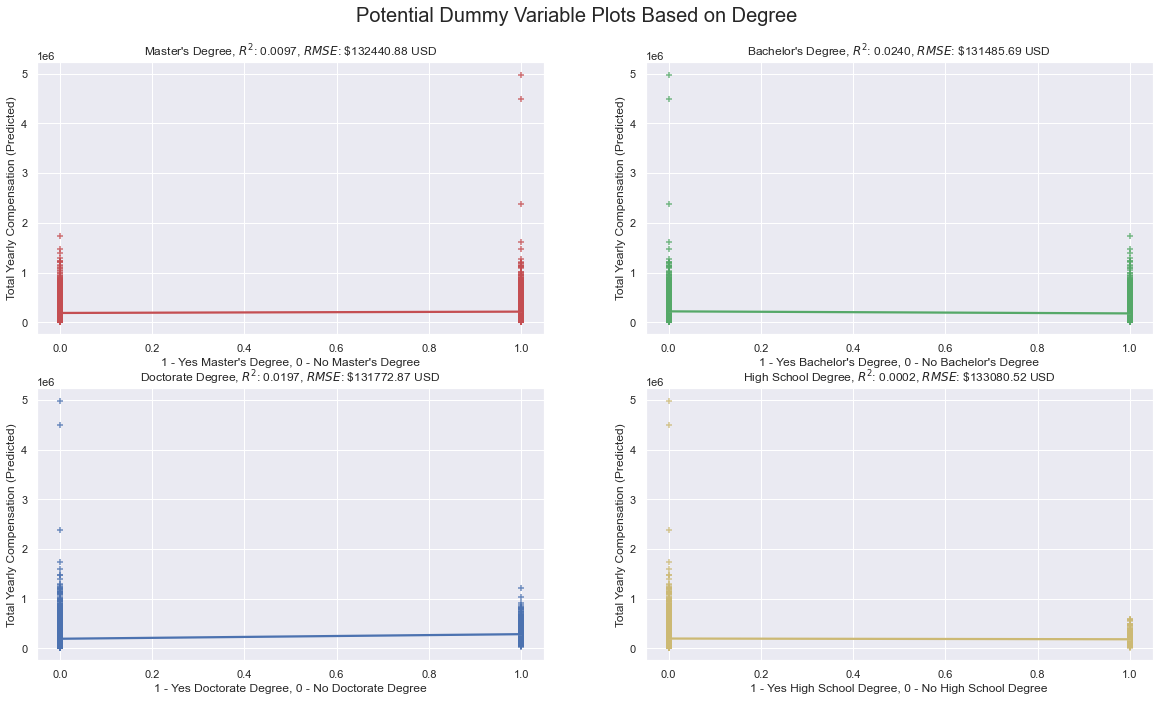

In [6]:
predictors = df_dropna[['Masters_Degree','Bachelors_Degree',
                        'Doctorate_Degree','Highschool']]

title_map = {'Masters_Degree': 'Master\'s Degree',
             'Bachelors_Degree': 'Bachelor\'s Degree',
             'Doctorate_Degree': 'Doctorate Degree',
             'Highschool': 'High School Degree'}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,11))
fig.suptitle('Potential Dummy Variable Plots Based on Degree', fontsize=20, y=0.95)

colors = ['r','g','b','y']

iter_col = iter(colors)

for pred, ax in zip(predictors, axs.ravel()):
    x = pd.DataFrame(predictors[pred], columns=[pred])
    y = label

    ols = LinearRegression().fit(x,y)
    y_hat = ols.predict(x)
    score = ols.score(x,y)
    rmse = (np.sqrt(mse(y, y_hat)))

    x_lin = np.linspace(0, x.max(), 100)
    lin_pred = ols.predict(x_lin)

    # ax.plot(x,y,'+', color=next(iter_col))
    # ax.plot(x_lin, lin_pred, color='black')

    sns.regplot(x=pred, y='totalyearlycompensation', data=df_dropna, ax=ax, color=next(iter_col), marker='+')

    ax.set_title(f'{title_map[pred]}, $R^{2}$: {score:.4f}, $RMSE$: \${rmse:.2f} USD')
    ax.set_ylabel('Total Yearly Compensation (Predicted)')
    ax.set_xlabel(f'1 - Yes {title_map[pred]}, 0 - No {title_map[pred]}')

In [7]:
corr = predictors.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(10)

C:\Users\sunny\AppData\Local\Temp/ipykernel_26488/2151522955.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(10)


,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool
Masters_Degree,1.0000000000,-0.8636527875,-0.1803962999,-0.1014437188
Bachelors_Degree,-0.8636527875,1.0000000000,-0.2142057322,-0.1204560520
Doctorate_Degree,-0.1803962999,-0.2142057322,1.0000000000,-0.0251439844
Highschool,-0.1014437188,-0.1204560520,-0.0251439844,1.0000000000


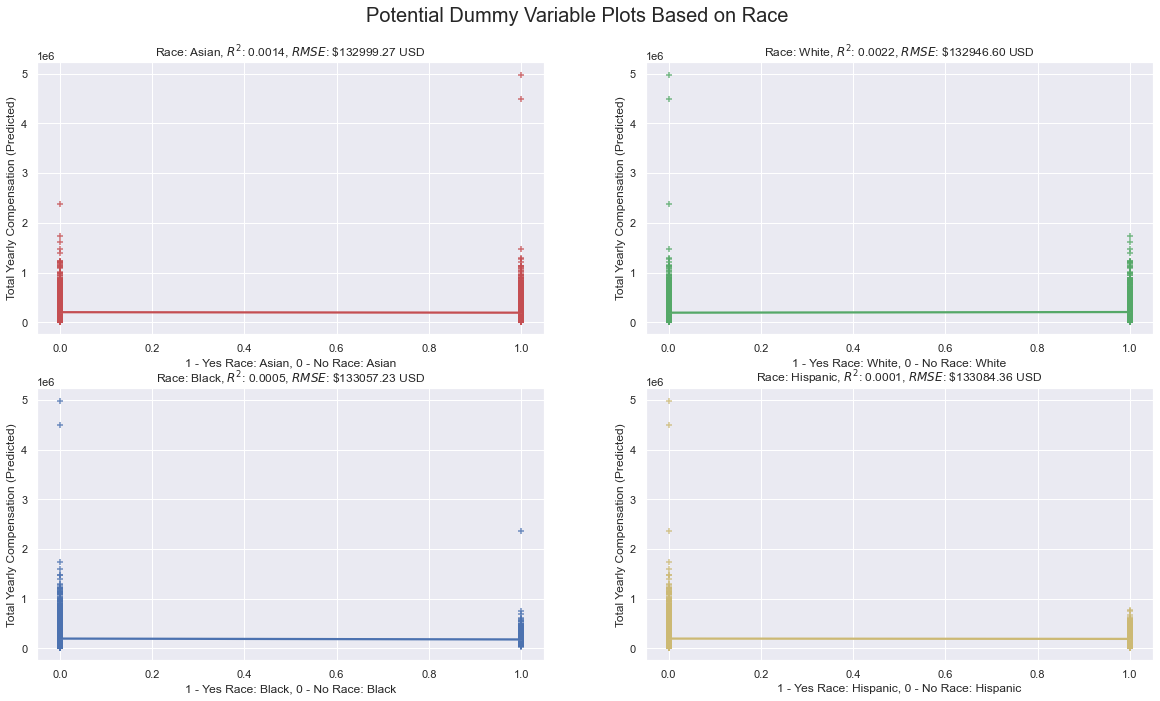

In [8]:
predictors = df_dropna[['Race_Asian','Race_White',
                        'Race_Black','Race_Hispanic']]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,11))
fig.suptitle('Potential Dummy Variable Plots Based on Race', fontsize=20, y=0.95)

title_map = {'Race_Asian': 'Race: Asian',
             'Race_White': 'Race: White',
             'Race_Black': 'Race: Black',
             'Race_Hispanic': 'Race: Hispanic'}

colors = ['r','g','b','y']

iter_col = iter(colors)

for pred, ax in zip(predictors, axs.ravel()):

    x = pd.DataFrame(predictors[pred], columns=[pred])
    y = label

    ols = LinearRegression().fit(x,y)
    y_hat = ols.predict(x)
    score = ols.score(x,y)
    rmse = (np.sqrt(mse(y, y_hat)))

    x_lin = np.linspace(0, x.max(), 100)
    lin_pred = ols.predict(x_lin)

    #ax.plot(x,y,'+', color=next(iter_col))
    #ax.plot(x_lin, lin_pred, color='black')

    sns.regplot(x=pred, y='totalyearlycompensation', data=df_dropna, ax=ax, color=next(iter_col), marker='+',)

    ax.set_title(f'{title_map[pred]}, $R^{2}$: {score:.4f}, $RMSE$: \${rmse:.2f} USD')
    ax.set_ylabel('Total Yearly Compensation (Predicted)')
    ax.set_xlabel(f'1 - Yes {title_map[pred]}, 0 - No {title_map[pred]}')

In [9]:
corr = predictors.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(10)

C:\Users\sunny\AppData\Local\Temp/ipykernel_26488/2151522955.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(10)


,Race_Asian,Race_White,Race_Black,Race_Hispanic
Race_Asian,1.0000000000,-0.7870174859,-0.1883767209,-0.2411949804
Race_White,-0.7870174859,1.0000000000,-0.1321624753,-0.1695192501
Race_Black,-0.1883767209,-0.1321624753,1.0000000000,-0.0405753125
Race_Hispanic,-0.2411949804,-0.1695192501,-0.0405753125,1.0000000000


With large $RMSE$'s (in terms of total yearly compensation) and miniscule $R^{2}$ scores, it would not make sense to use each (any) of these variables as sole predictors toward the label (not that it would have counted in the first place due to such dismal scores).

Another variable I would like to explore individually is gender, however as this variable is the focus of Question 4, I will include a simple regression (through dummy variables) but solely utilize derived $RMSE$ and $R^{2}$ values.

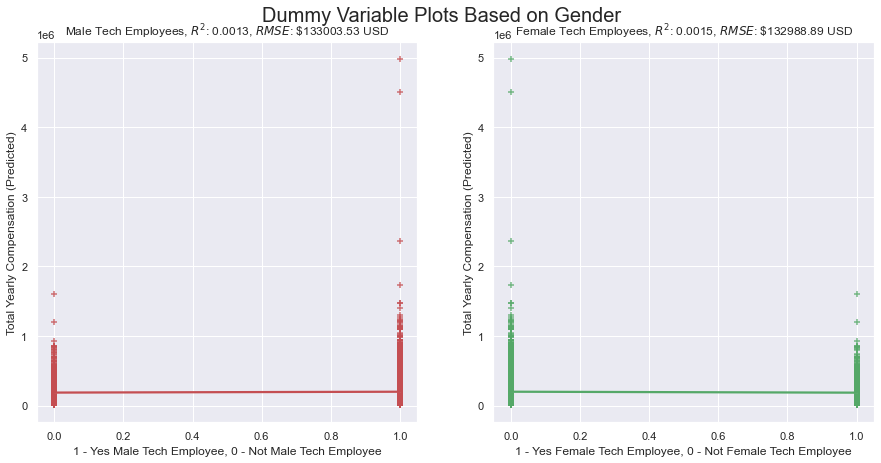

In [10]:
predictors_gend = pd.get_dummies(df_dropna[['gender']], prefix=[''], 
                                 prefix_sep='')[['Male','Female']]

concat = pd.concat([predictors_gend,label], axis=1)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
fig.suptitle('Dummy Variable Plots Based on Gender', fontsize=20, y=0.95)

title_map = {'Female': 'Female Tech Employees',
             'Male': 'Male Tech Employees'}

colors = ['r','g','b','y','orange']

iter_col = iter(colors)

for pred, ax in zip(predictors_gend, axs.ravel()):
    x = pd.DataFrame(predictors_gend[pred], columns=[pred])
    y = label

    ols = LinearRegression().fit(x,y)
    y_hat = ols.predict(x)
    score = ols.score(x,y)
    rmse = (np.sqrt(mse(y, y_hat)))

    x_lin = np.linspace(0, x.max(), 100)
    lin_pred = ols.predict(x_lin)

    #ax.plot(x,y,'+', color=next(iter_col))
    #ax.plot(x_lin, lin_pred, color='black')

    sns.regplot(x=pred, y='totalyearlycompensation', data=concat, ax=ax, color=next(iter_col), marker='+',)

    ax.set_title(f'{title_map[pred]}, $R^{2}$: {score:.4f}, $RMSE$: \${rmse:.2f} USD')
    ax.set_ylabel('Total Yearly Compensation (Predicted)')
    ax.set_xlabel(f'1 - Yes {pred} Tech Employee, 0 - Not {pred} Tech Employee')

In [11]:
corr = predictors_gend.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(10)

C:\Users\sunny\AppData\Local\Temp/ipykernel_26488/1644299839.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(10)


,Male,Female
Male,1.0000000000,-0.9836566699
Female,-0.9836566699,1.0000000000


The last predictor I would like to explore further is Zodiac Signs, given the discrete nature of its' values.

Text(0.5, 0, 'Zodiac Sign (0 to 12 Being the Sign Associated with Each Numbered Month)')

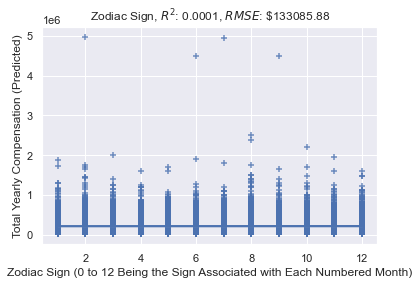

In [12]:
predictors = df_dropna[['Zodiac']]

x = predictors
y = label

title_map = {'Zodiac': 'Zodiac Sign'}
# palette = sns.color_palette(cc.glasbey,n_colors=12) ## Acts as a vestigial line in effort to color-code plots.

pred = 'Zodiac' ## I know this isn't pretty, but I am learning from the process of passing in titles as strings as well

ols = LinearRegression().fit(x,y)
y_hat = ols.predict(x)
score = ols.score(x,y)
rmse = (np.sqrt(mse(y, y_hat)))

ax = sns.regplot(x='Zodiac', y='totalyearlycompensation', data=df, marker='+')

ax.set_title(f'{title_map[pred]}, $R^{2}$: {score:.4f}, $RMSE$: \${rmse:.2f}')
ax.set_ylabel('Total Yearly Compensation (Predicted)')
ax.set_xlabel('Zodiac Sign (0 to 12 Being the Sign Associated with Each Numbered Month)')

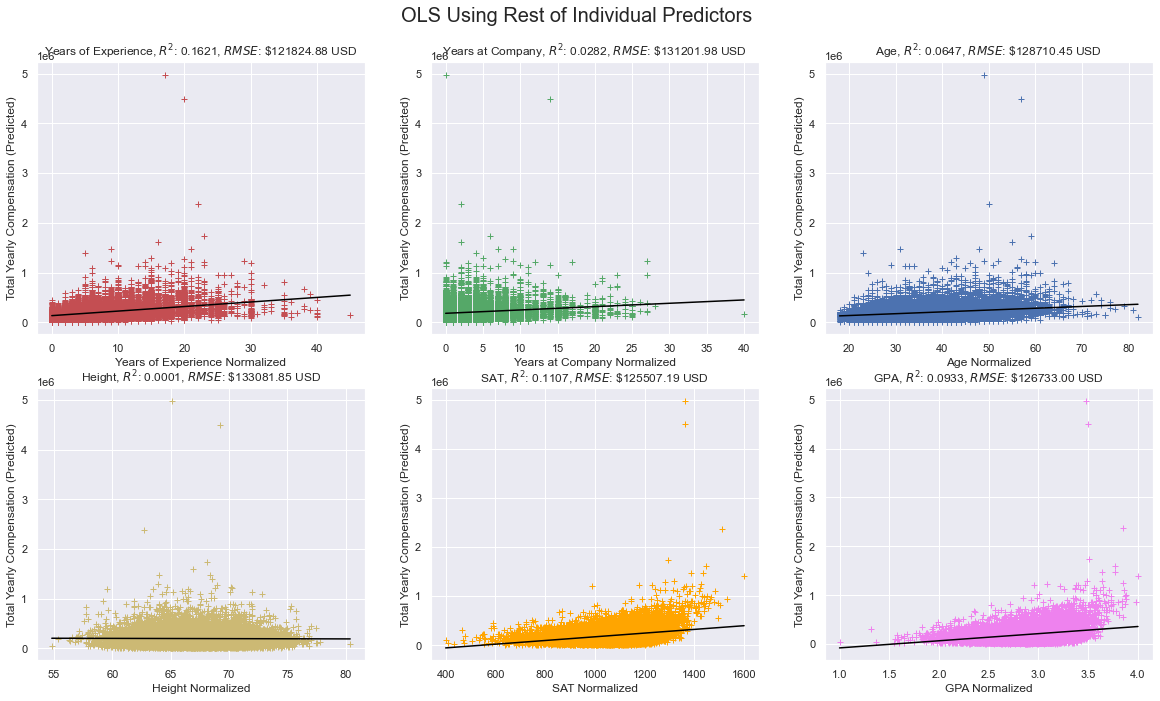

In [13]:
predictors = df_dropna[['yearsofexperience','yearsatcompany','Age',
                        'Height','SAT','GPA']]

# predictors = (predictors - predictors.mean()) / predictors.std() # vestigial code for standardization

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,11))
fig.suptitle('OLS Using Rest of Individual Predictors', fontsize=20, y=0.95)

title_map = {'yearsofexperience': 'Years of Experience',
             'yearsatcompany': 'Years at Company',
             'Age': 'Age',
             'Height': 'Height',
             'SAT': 'SAT',
             'GPA': 'GPA'}

colors = ['r','g','b','y','orange','violet']

iter_col = iter(colors)

for pred, ax in zip(predictors, axs.ravel()):
    x = pd.DataFrame(predictors[pred], columns=[pred])
    y = label

    ols = LinearRegression().fit(x,y)
    y_hat = ols.predict(x)
    score = ols.score(x,y)
    rmse = (np.sqrt(mse(y, y_hat)))

    x_lin = np.linspace(x.min(), x.max(), 100)
    lin_pred = ols.predict(x_lin)

    ax.plot(x,y,'+', color=next(iter_col))
    ax.plot(x_lin, lin_pred, color='black')

    # sns.regplot(x=pred, y='totalyearlycompensation', data=df_dropna, ax=ax, color=next(iter_col), marker='+')

    ax.set_title(f'{title_map[pred]}, $R^{2}$: {score:.4f}, $RMSE$: \${rmse:.2f} USD')
    ax.set_ylabel('Total Yearly Compensation (Predicted)')
    ax.set_xlabel(f'{title_map[pred]} Normalized')

In [14]:
corr = predictors.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(10)

C:\Users\sunny\AppData\Local\Temp/ipykernel_26488/2151522955.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(10)


,yearsofexperience,yearsatcompany,Age,Height,SAT,GPA
yearsofexperience,1.0000000000,0.5374670764,0.6306119604,-0.0103981534,0.1388751382,0.1238546744
yearsatcompany,0.5374670764,1.0000000000,0.3387777938,-0.0083361083,0.0435395128,0.0366751208
Age,0.6306119604,0.3387777938,1.0000000000,-0.0073548101,0.0916976179,0.0842780283
Height,-0.0103981534,-0.0083361083,-0.0073548101,1.0000000000,-0.0043821401,-0.0044356565
SAT,0.1388751382,0.0435395128,0.0916976179,-0.0043821401,1.0000000000,0.9126461117
GPA,0.1238546744,0.0366751208,0.0842780283,-0.0044356565,0.9126461117,1.0000000000


### Simple_OLS Results & Interpretation

From the regressions previous, we can see that `Years of Experience`, with an $R^{2} = 0.1621$ and $RMSE = \$121824.88$ has most predictive value of of all other $R^{2}$'s and $RMSE$'s considered for single-predictor OLS analysis.

One note of caution is the high correlation implying high multicolinearity between the predictors `SAT` and `GPA` which will be addressed using regularization moving forward.

Finally, we will run the full multiple-regression using all previously noted predictors mentioned above, minus categorical variables to be removed.

### Full Multiple-Linear Regression

In [15]:
predictors = df_dropna[['yearsofexperience','yearsatcompany','Masters_Degree','Bachelors_Degree',
                        'Doctorate_Degree','Highschool','Race_Asian','Race_White',
                        'Race_Black','Race_Hispanic','Age','Height','Zodiac','SAT','GPA']]

grand_predictors = pd.concat([predictors, predictors_gend], axis=1) 

# predictors = (predictors - predictors.mean()) / predictors.std() ## vestigial code for standardization

X = grand_predictors
y = label

ols = LinearRegression().fit(X,y)
y_hat = ols.predict(X)
score = ols.score(X,y)
coefs_OLS = ols.coef_[0]

rmse = mse(y, y_hat) ** 0.5

X_train = sm.add_constant(X)
ls = sm.OLS(y, X_train).fit()

print(f'RMSE: ${rmse:.2f} USD')
ls.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


RMSE: $113982.53 USD


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     totalyearlycompensation   R-squared:                       0.267
Model:                                 OLS   Adj. R-squared:                  0.266
Method:                      Least Squares   F-statistic:                     461.1
Date:                     Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                             11:24:01   Log-Likelihood:            -2.8201e+05
No. Observations:                    21589   AIC:                         5.641e+05
Df Residuals:                        21571   BIC:                         5.642e+05
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.542e+05   2.35e+04     -6.570      0.000      -2e+05   -1.08e+05
yearsofexperience  8848.0098    193.920     45.627      0.000    8467.913    9228.107
yearsatcompany    -2310.9968    277.524     -8.327      0.000   -2854.964   -1767.029
Masters_Degree     2.743e+04   6353.459      4.317      0.000     1.5e+04    3.99e+04
Bachelors_Degree   5051.8277   6304.741      0.801      0.423   -7305.931    1.74e+04
Doctorate_Degree    9.87e+04   7263.857     13.588      0.000    8.45e+04    1.13e+05
Highschool        -7758.0703   9025.628     -0.860      0.390   -2.54e+04    9932.829
Race_Asian        -1.657e+04   4304.878     -3.848      0.000    -2.5e+04   -8127.514
Race_White        -1.306e+04   4350.836     -3.001      0.003   -2.16e+04   -4527.736
Race_Black        -1.852e+04   6072.106     -3.050      0.002   -3.04e+04   -6615.578
Race_Hispanic     -1.681e+04   5417.367     -3.103      0.002   -2.74e+04   -6189.226
Age                 -45.2223    107.889     -0.419      0.675    -256.692     166.248
Height             -263.5703    258.486     -1.020      0.308    -770.221     243.081
Zodiac              480.3113    225.018      2.135      0.033      39.260     921.363
SAT                 292.9841     16.207     18.077      0.000     261.217     324.752
GPA                6836.8581   6822.183      1.002      0.316   -6535.125    2.02e+04
Male               -2.51e+04   1.12e+04     -2.242      0.025    -4.7e+04   -3157.574
Female            -2.996e+04   1.13e+04     -2.649      0.008   -5.21e+04   -7788.672
==============================================================================
Omnibus:                    28630.256   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40121293.596
Skew:                           6.786   Prob(JB):                         0.00
Kurtosis:                     213.755   Cond. No.                     3.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Total Yearly Compensation (Actual)')

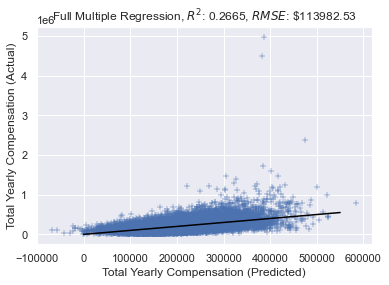

In [16]:
y_hat = pd.DataFrame(y_hat, columns=['y_hat'])
y.reset_index(drop=True, inplace=True)

scatter_data = pd.concat([y,y_hat], axis=1, ignore_index=True)
scatter_data.columns = ['y','y_hat']

sns.scatterplot(x='y_hat', y='y', data=scatter_data, marker='+')
# ax.set(yscale='log')
lin = np.linspace(0,550000, 550000)
sns.lineplot(x=lin, y=lin, color='black')

plt.title(f'Full Multiple Regression, $R^{2}$: {score:.4f}, $RMSE$: \${rmse:.2f}')
plt.xlabel('Total Yearly Compensation (Predicted)')
plt.ylabel('Total Yearly Compensation (Actual)')

### Full Multiple-Prediction Results

In our full-regression model, we obtain an unadjusted $R^{2} = 0.2665$, higher than the $R^{2} = 0.1621$ of our best single predictor, `Years of Experience`. This means that our full model explains roughly 26% of the variance in the label, compared to the approx. 16% explained by the single-predictor model. 

Further considering $RMSE$, we see that our $RMSE = \$113982.36$ USD is also less than the value of our best single-predictor model (which has an $RMSE = \$121824.88$ USD).

# Question 2

Using ridge regression to do the same as in 1): How does the model change or improve compared to OLS? What is the optimal lambda?

## Answer

From my understanding of models operating under Ridge/LASSO (as well as the guidance of Professor Wallisch), there is no reasonable method to implement simple OLS models of Ridge or LASSO. Therefore, all following analysis will be focused on the full multiple regression model.

As mentioned previously, due to regularization being sensitive to predictors without the same scale and variance, we will standardize with the equation shown below: $$\frac{X - \mu}{\sigma} $$

First, let's inspect the predictors using a correlation matrix:

In [17]:
corr = grand_predictors.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(10)

C:\Users\sunny\AppData\Local\Temp/ipykernel_26488/2613323200.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(10)


,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Race_Asian,Race_White,Race_Black,Race_Hispanic,Age,Height,Zodiac,SAT,GPA,Male,Female
yearsofexperience,1.0000000000,0.5374670764,0.0967320041,-0.1164152777,-0.0017233125,0.0195365558,-0.1028825439,0.1279286903,-0.0360670453,0.0010356464,0.6306119604,-0.0103981534,-0.0042388510,0.1388751382,0.1238546744,0.0610767433,-0.0607921522
yearsatcompany,0.5374670764,1.0000000000,0.0403670837,-0.0440710588,0.0092918766,-0.0101871912,-0.0568566907,0.0889113876,-0.0457099328,-0.0093342846,0.3387777938,-0.0083361083,0.0010480012,0.0435395128,0.0366751208,0.0461373374,-0.0443893356
Masters_Degree,0.0967320041,0.0403670837,1.0000000000,-0.8636527875,-0.1803962999,-0.1014437188,0.2383064695,-0.1840162562,-0.0390993111,-0.0713282879,0.0638814465,-0.0001099272,-0.0123178638,0.0317103339,0.0287151775,-0.0200595174,0.0228730089
Bachelors_Degree,-0.1164152777,-0.0440710588,-0.8636527875,1.0000000000,-0.2142057322,-0.1204560520,-0.1820286533,0.1310891328,0.0401545371,0.0619934426,-0.0788602205,-0.0008074868,0.0111904495,-0.0545527577,-0.0497156696,-0.0034012239,0.0026371194
Doctorate_Degree,-0.0017233125,0.0092918766,-0.1803962999,-0.2142057322,1.0000000000,-0.0251439844,-0.0066541083,0.0206981188,-0.0203531903,-0.0049706110,0.0071070195,-0.0071536138,0.0057985079,0.0485749831,0.0454953909,0.0245358322,-0.0250702954
Highschool,0.0195365558,-0.0101871912,-0.1014437188,-0.1204560520,-0.0251439844,1.0000000000,-0.0998249379,0.0849311035,0.0017648462,0.0293482881,0.0059404659,0.0173588163,-0.0074637249,0.0011843629,-0.0034817877,0.0362202916,-0.0433122248
Race_Asian,-0.1028825439,-0.0568566907,0.2383064695,-0.1820286533,-0.0066541083,-0.0998249379,1.0000000000,-0.7870174859,-0.1883767209,-0.2411949804,-0.0655810594,-0.0044559636,-0.0019430446,-0.0230004216,-0.0223462636,-0.0030184231,0.0115189409
Race_White,0.1279286903,0.0889113876,-0.1840162562,0.1310891328,0.0206981188,0.0849311035,-0.7870174859,1.0000000000,-0.1321624753,-0.1695192501,0.0803974284,0.0097453598,0.0060111601,0.0212462844,0.0211814045,0.0209386326,-0.0219886542
Race_Black,-0.0360670453,-0.0457099328,-0.0390993111,0.0401545371,-0.0203531903,0.0017648462,-0.1883767209,-0.1321624753,1.0000000000,-0.0405753125,-0.0204489939,-0.0034283472,-0.0079511225,0.0027508227,0.0022784120,-0.0379283883,0.0392026924
Race_Hispanic,0.0010356464,-0.0093342846,-0.0713282879,0.0619934426,-0.0049706110,0.0293482881,-0.2411949804,-0.1695192501,-0.0405753125,1.0000000000,0.0071229572,-0.0098916121,-0.0015210793,-0.0023432549,-0.0055757688,0.0155173909,-0.0161014946


Next, the code blocks for the Ridge Regularized Regression:

In [18]:
predictors = df_dropna[['yearsofexperience','yearsatcompany','Masters_Degree','Bachelors_Degree',
                        'Doctorate_Degree','Highschool','Race_Asian','Race_White',
                        'Race_Black','Race_Hispanic','Age','Height','Zodiac','SAT','GPA']]

grand_predictors = pd.concat([predictors, predictors_gend], axis=1)

cols = grand_predictors.columns
indexes = grand_predictors.index

grand_predictors = sc().fit_transform(grand_predictors)
grand_predictors = pd.DataFrame(data=grand_predictors, index=indexes, columns=cols)

X = grand_predictors
y = label

For the `train_test_split` method used to generate splits of data to train/test on, I stuck with the arbitrary random seed of '1234', for reproductibility of hyperparameters in the future. **This applies both below and for "Question 3"**.

Furthermore, included are plots for the hyperparameter-tuning as well as a plot of the RMSE against the optimal $\lambda$.

100%|██████████| 800/800 [03:51<00:00,  3.45it/s]


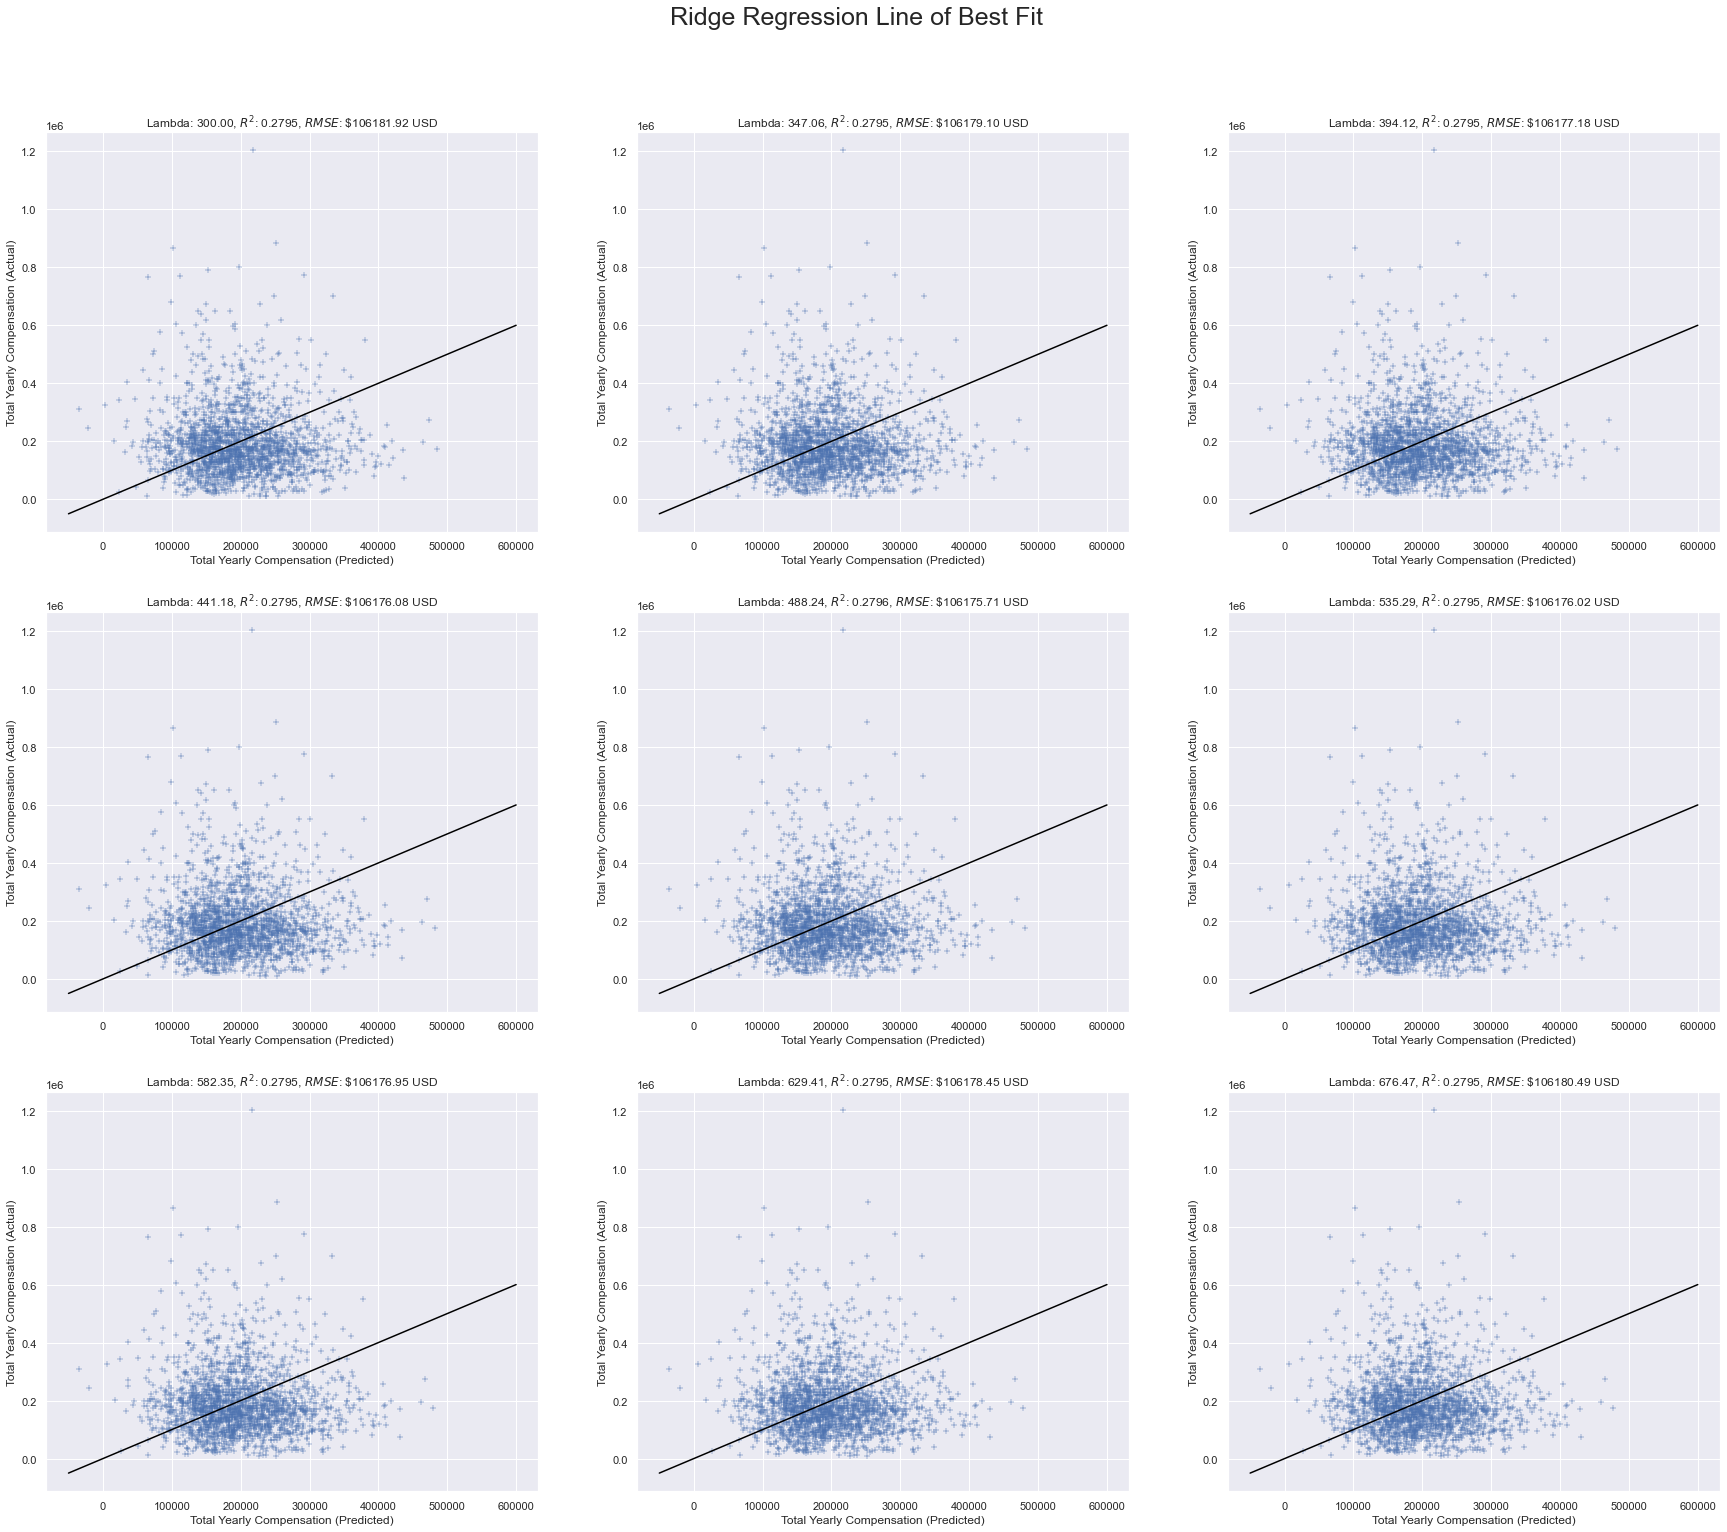

In [20]:
# grand_predictors = (grand_predictors - grand_predictors.mean()) / grand_predictors.std()

smallest, largest, between = 300, 700, 800

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,25))
fig.suptitle('Ridge Regression Line of Best Fit', fontsize=25, y=0.95)
iter_ax = iter(axs.flatten())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
lambdas = np.linspace(smallest, largest, between)
container = np.empty([len(lambdas),2])*np.NaN

for index in tqdm(range(len(lambdas))):
    ridge = Ridge(alpha=lambdas[index]).fit(X_train, y_train)
    y_hat = ridge.predict(X_test)
    score = ridge.score(X_test, y_test)

    container[index,0] = lambdas[index]
    error = mse(y_test, y_hat, squared=False)
    container[index,1] = error

    if index % int(len(lambdas)/8.5) == 0:
        ax = next(iter_ax)

        y_hat = pd.DataFrame(y_hat, columns=['y_hat']).reset_index(drop=True)
        # y.reset_index(drop=True, inplace=True)

        scatter_data = pd.concat([y_test,y_hat], axis=1, ignore_index=True)
        scatter_data.columns = ['y_test','y_hat']

        # sns.pairplot(scatter_data)
        sns.scatterplot(x='y_hat', y='y_test', data=scatter_data, marker='+', ax=ax)
        # ax.set(yscale='log')
        lin = np.linspace(-50000,600000, (y_test.max()[0]-y_test.min()[0]))
        sns.lineplot(x=lin, y=lin, color ='black', ax=ax)

        # sns.regplot(x=y_hat, y=y_test, ax=ax, marker='+')
        ax.set_title(f'Lambda: {lambdas[index]:.2f}, $R^{2}$: {score:.4f}, $RMSE$: \${error:.2f} USD')
        ax.set_xlabel('Total Yearly Compensation (Predicted)')
        ax.set_ylabel('Total Yearly Compensation (Actual)')

Optimal Lambda: 489.73717146433046


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


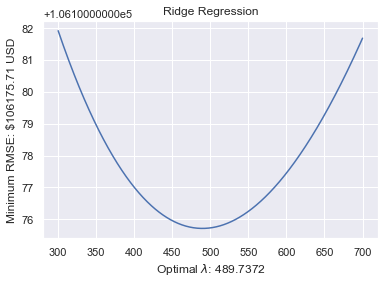

In [21]:
ax = sns.lineplot(container[:,0],container[:,1])
optimal = lambdas[np.argmax(container[:,1]==np.min(container[:,1]))]
minimum = np.min(container[:,1])

ax.set_xlabel(f'Optimal $\lambda$: {optimal:.4f}')
ax.set_ylabel(f'Minimum RMSE: \${minimum:.2f} USD')
ax.set_title('Ridge Regression')
print('Optimal Lambda:', optimal)

The model improves upon OLS: by using $\lambda = 489.737$, we obtain the lower $RMSE = \$106175.71$ (through Ridge) compared to $RMSE = \$113982.36$ for the full OLS multiple-regression.

Below are the coefficients, and it can be seen that many variables, including `Masters_Degree` and `Male` & `Female` were drastically decreased.

In [22]:
ridge = Ridge(alpha=optimal).fit(X_train, y_train)
coefs_Ridge = np.array(ridge.coef_)

# Sanity check
print(f'OLS Data Shape: {coefs_OLS.shape}')
print(f'Ridge Data Shape: {coefs_Ridge.shape}')

df_coefs = pd.DataFrame(coefs_OLS, columns=['coefs_OLS'])
df_coefs['coefs_Ridge'] = coefs_Ridge.T
df_coefs['labels'] = grand_predictors.columns
df_coefs = df_coefs.reindex(columns=['labels','coefs_OLS','coefs_Ridge'])
df_coefs

OLS Data Shape: (17,)
Ridge Data Shape: (1, 17)


,labels,coefs_OLS,coefs_Ridge
0,yearsofexperience,8848.009837,49001.345005
1,yearsatcompany,-2310.996757,-6781.864462
2,Masters_Degree,27425.697021,6813.787607
3,Bachelors_Degree,5051.827715,-4234.029232
4,Doctorate_Degree,98702.052122,16249.671136
5,Highschool,-7758.070252,-1762.541855
6,Race_Asian,-16565.393695,-7197.138131
7,Race_White,-13055.695693,-5511.568711
8,Race_Black,-18517.354735,-2387.578658
9,Race_Hispanic,-16807.665387,-2889.109040


# Question 3

Using Lasso regression to do the same as in 1): How does the model change now? How many of the predictor betas are shrunk to exactly 0? What is the optimal lambda now?

## Answer

Similar to the Ridge Regression implemented previously, we will now run LASSO below. I have used the same methods of standardization as in "Question 2" as well as the predictors. The data underwent a `train_test_split` with `test_size` = 0.3 and the same random state = 1234 as previously.

Shown plotted are also snapshots of the hyperparameter-tuning and RMSE comapred to $\lambda$ for all tested ranges of $\lambda$'s:

In [23]:
predictors = df_dropna[['yearsofexperience','yearsatcompany','Masters_Degree','Bachelors_Degree',
                        'Doctorate_Degree','Highschool','Race_Asian','Race_White',
                        'Race_Black','Race_Hispanic','Age','Height','Zodiac','SAT','GPA']]

grand_predictors = pd.concat([predictors, predictors_gend], axis=1)

cols = grand_predictors.columns
indexes = grand_predictors.index

grand_predictors = sc().fit_transform(grand_predictors)
grand_predictors = pd.DataFrame(data=grand_predictors, index=indexes, columns=cols)

X = grand_predictors
y = label

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\sunny\AppData\Local\Temp/ipykernel_26488/252103666.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso = Lasso(alpha=lambdas[index]).fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103746251716499.4, tolerance: 28105972806.776077
  model = cd_fast.enet_coordinate_descent(
100%|██████████| 500/500 [03:55<00:00,  2.13it/s]


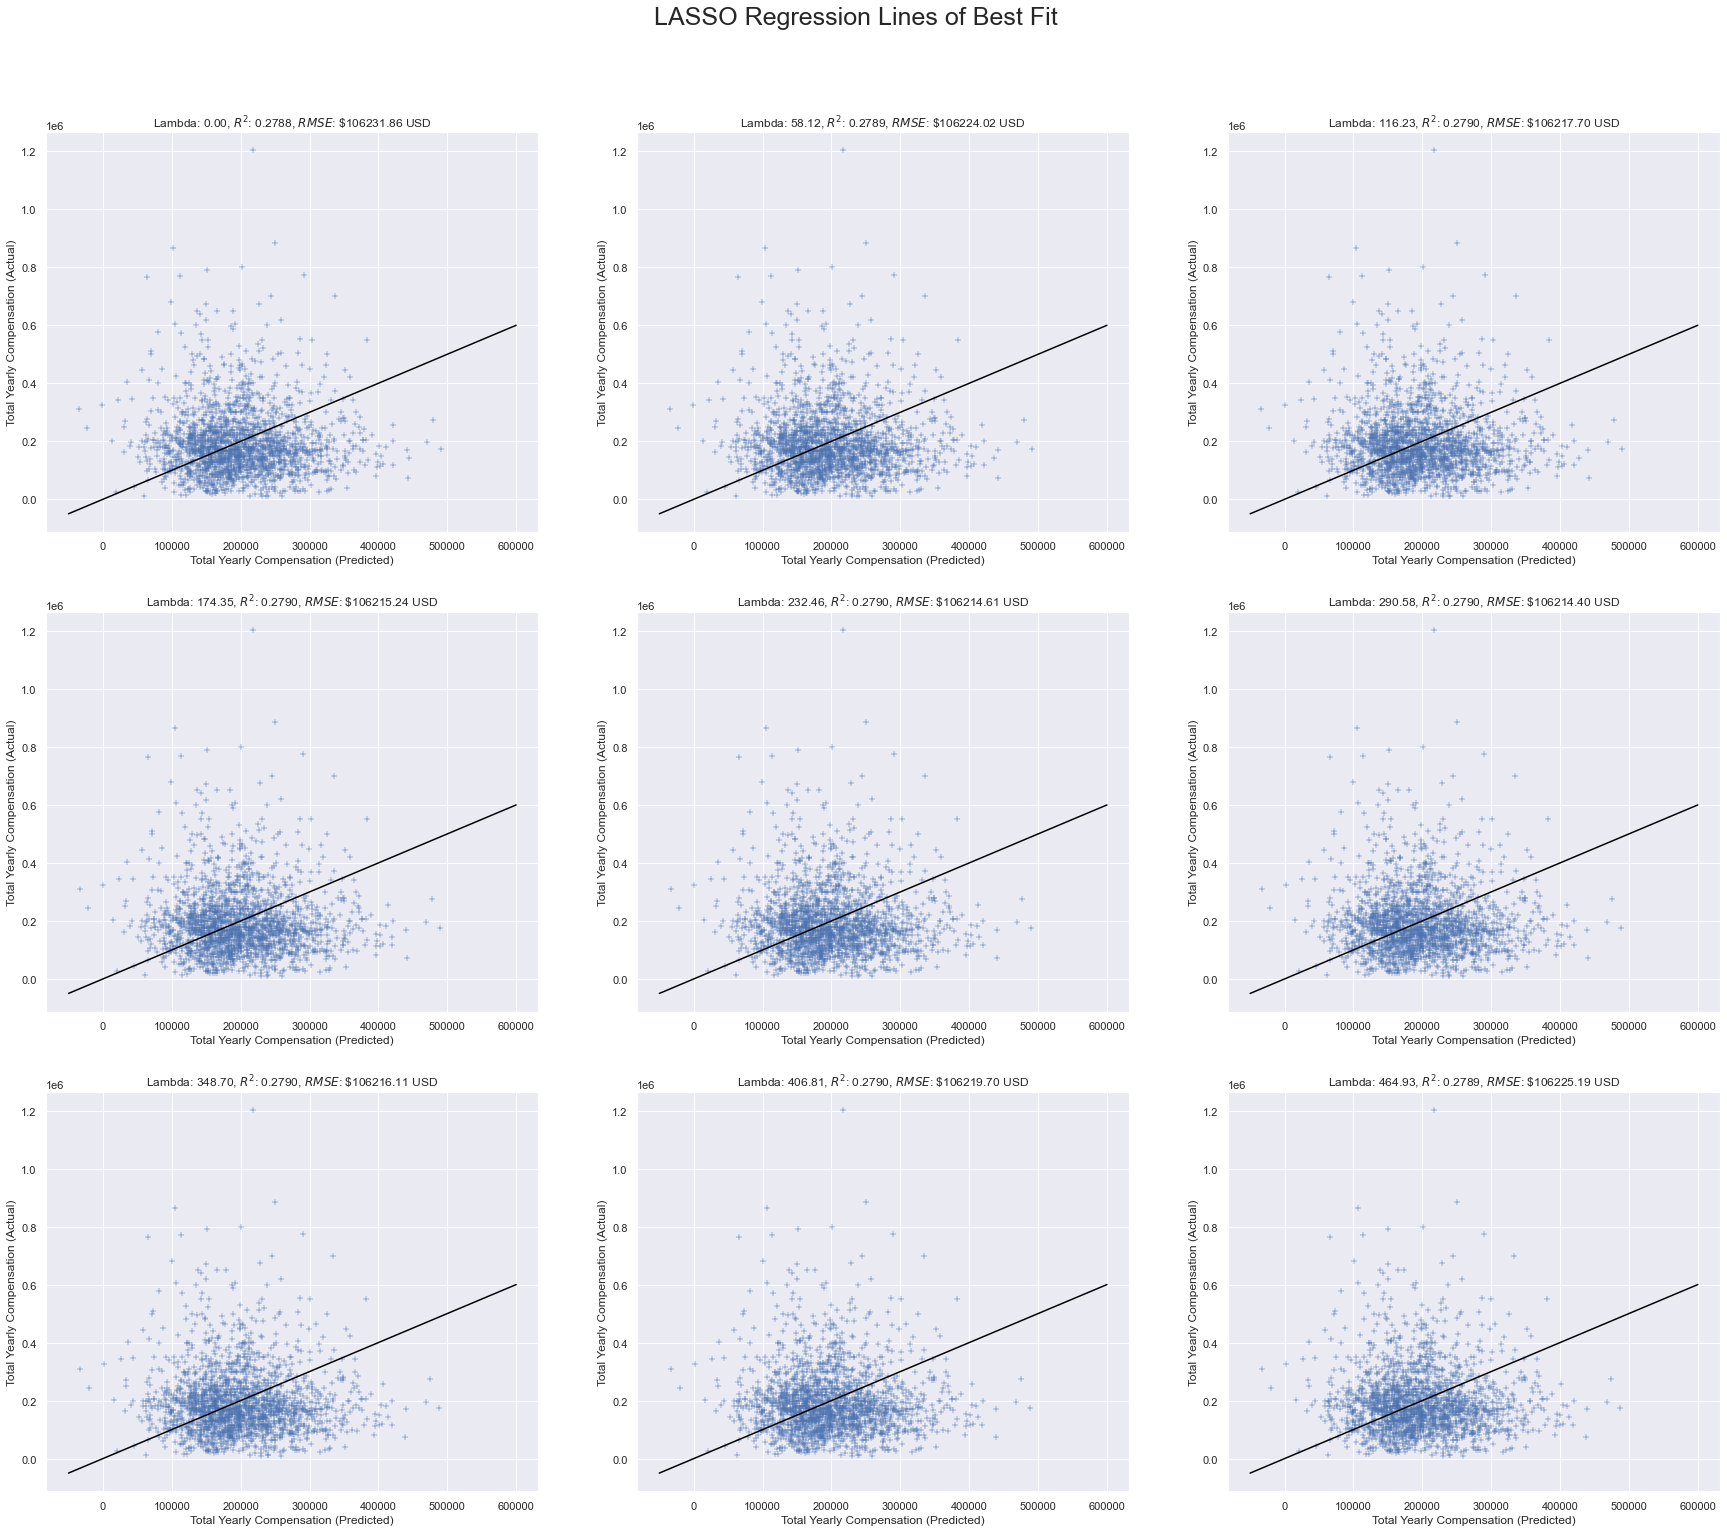

In [25]:
# grand_predictors = (grand_predictors - grand_predictors.mean()) / grand_predictors.std() ## Vestigial, using StandardScalar.fit_transform instead

smallest, largest, between = 0, 500, 500

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,25))
fig.suptitle('LASSO Regression Lines of Best Fit', fontsize=25, y=0.95)
iter_ax = iter(axs.flatten())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
lambdas = np.linspace(smallest, largest, between)
container = np.empty([len(lambdas),2]) * np.NaN

for index in tqdm(range(len(lambdas))):
    lasso = Lasso(alpha=lambdas[index]).fit(X_train, y_train)
    y_hat = lasso.predict(X_test)
    score = lasso.score(X_test, y_test)

    container[index,0] = lambdas[index]
    error = mse(y_test, y_hat, squared=False)
    container[index,1] = error

    if index % int(len(lambdas)/8.5) == 0:
        
        ax = next(iter_ax)

        y_hat = pd.DataFrame(y_hat, columns=['y_hat']).reset_index(drop=True)
        # y.reset_index(drop=True, inplace=True)

        scatter_data = pd.concat([y_test,y_hat], axis=1, ignore_index=True)
        scatter_data.columns = ['y_test','y_hat']

        # sns.pairplot(scatter_data)
        sns.scatterplot(x='y_hat', y='y_test', data=scatter_data, marker='+', ax=ax)
        # ax.set(yscale='log')
        lin = np.linspace(-50000,600000, (y_test.max()[0]-y_test.min()[0]))
        sns.lineplot(x=lin, y=lin, color ='black', ax=ax)

        # sns.regplot(x=y_hat, y=y_test, ax=ax, marker='+')
        ax.set_title(f'Lambda: {lambdas[index]:.2f}, $R^{2}$: {score:.4f}, $RMSE$: \${error:.2f} USD')
        ax.set_xlabel('Total Yearly Compensation (Predicted)')
        ax.set_ylabel('Total Yearly Compensation (Actual)')

Optimal Lambda: 269.5390781563126


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


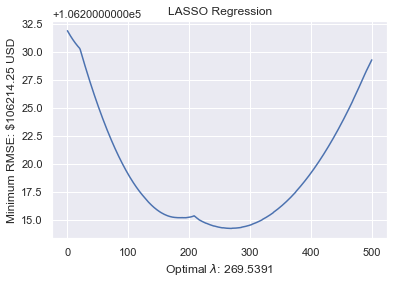

In [26]:
ax = sns.lineplot(container[:,0],container[:,1])

optimal = lambdas[np.argmax(container[:,1]==np.min(container[:,1]))]
minimum = np.min(container[:,1])

ax.set_xlabel(f'Optimal $\lambda$: {optimal:.4f}')
ax.set_ylabel(f'Minimum RMSE: \${minimum:.2f} USD')
ax.set_title('LASSO Regression')
print('Optimal Lambda:', optimal)

### LASSO Interpretation & Analysis

From the above, we can see that the optimal $\lambda = 268.671679$ with an $RMSE = \$106214.25$ USD, compared to an $RMSE = \$113982.36$ USD for the full-predictor multiple-regression.

The coefficients comparing LASSO, Ridge, and OLS models are shown below, with three predictors, `Age`, `GPA`, and `Male` having shrunk to exactly 0:

In [27]:
lasso = Lasso(alpha=optimal).fit(X_train, y_train)
coefs_LASSO = np.array(lasso.coef_)

# Sanity check
print(f'OLS Data Shape: {coefs_OLS.shape}')
print(f'LASSO Data Shape: {coefs_LASSO.shape}')

df_coefs = pd.DataFrame(coefs_OLS, columns=['coefs_OLS'])
df_coefs['coefs_LASSO'] = coefs_LASSO
df_coefs['coefs_Ridge'] = coefs_Ridge.T
df_coefs['labels'] = grand_predictors.columns

df_coefs = df_coefs.reindex(columns=['labels','coefs_OLS','coefs_Ridge','coefs_LASSO'])

df_coefs

OLS Data Shape: (17,)
LASSO Data Shape: (17,)


,labels,coefs_OLS,coefs_Ridge,coefs_LASSO
0,yearsofexperience,8848.009837,49001.345005,51520.462366
1,yearsatcompany,-2310.996757,-6781.864462,-7744.895340
2,Masters_Degree,27425.697021,6813.787607,10511.216984
3,Bachelors_Degree,5051.827715,-4234.029232,-170.143156
4,Doctorate_Degree,98702.052122,16249.671136,18066.039440
5,Highschool,-7758.070252,-1762.541855,-676.961749
6,Race_Asian,-16565.393695,-7197.138131,-5647.282923
7,Race_White,-13055.695693,-5511.568711,-4088.334255
8,Race_Black,-18517.354735,-2387.578658,-1650.987694
9,Race_Hispanic,-16807.665387,-2889.109040,-2104.781651


# Question 4

There is controversy as to the existence of a male/female gender pay gap in tech job compensation. Build a logistic regression model (with gender as the outcome variable) to see if there is an appreciable beta associated with total annual compensation with and without controlling for other factors.

## Answer

Logistic Regression is not sensitive to the magnitude of variables, and as such I will not be standardizing.

By controlling for other factors, I will be running a multiple predictor logistic regression in order to understand the relative change in the size of the $\beta$ associated with compensation to show how much of an "appreciable" effect other, outside factors have, otherwise I will run a simple logistic-regression to predict for an appreciable $\beta$.

To build our dataframe, we will be numerically transcribing each gender `Male` and `Female` to "0 - Male" and "1 - Female".

In [28]:
gender = df_dropna[['gender']]
gender.loc[:,'gender_logistic'] = np.NaN

gender.loc[(gender['gender'] == 'Female'), 'gender_logistic'] = 1
gender.loc[(gender['gender'] == 'Male'), 'gender_logistic'] = 0

gender.dropna(axis=0, inplace=True)

q4_predictors = df_dropna.loc[gender.index, ['totalyearlycompensation','yearsofexperience','yearsatcompany','Masters_Degree','Bachelors_Degree',
                                             'Doctorate_Degree','Highschool','Race_Asian','Race_White',
                                             'Race_Black','Race_Hispanic','Age','Height','Zodiac','SAT','GPA']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

Next, using scikit-learn's `LogisticRegression` module, a logistic regression will be run with the single predictor `totalyearlycompensation` acting against the outcome, `gender_logistic`, the previously defined dataframe of 0's and 1's. An output of the plot is shown below: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


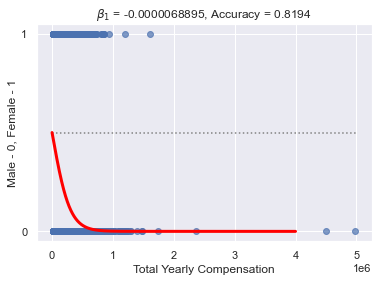

In [54]:
x = q4_predictors[['totalyearlycompensation']]
y = gender[['gender_logistic']]

model_solo = LogisticRegression().fit(x,y)
score_solo = model_solo.score(x,y)
proba_solo = model_solo.predict_proba(x)[:,1]

## Code mostly derived from IDS F'22, special thanks to Stephen Spivak
from scipy.special import expit

x1 = np.linspace(0,4000000,10000000)
y1 = x1 * model_solo.coef_ + model_solo.intercept_
sigmoid = expit(y1)

plt.plot(x1,sigmoid.ravel(),color='red',linewidth=3)
plt.scatter(x,y, alpha=0.7)
plt.hlines(0.5,0,5000000,colors='gray',linestyles='dotted')
plt.xlabel('Total Yearly Compensation')
# plt.xlim([260,345])
plt.ylabel('Male - 0, Female - 1')
plt.yticks(np.array([0,1]))
plt.title(f'$\\beta_{1}$ = {model_solo.coef_[0][0]:.10f}, Accuracy = {score_solo:.4f}')

plt.show()

We can see for this model that, while the accuracy is decently high, the ROC AUC is dismal, meaning that the model almost does no better at distinguishing positive and negative classes than simply guessing

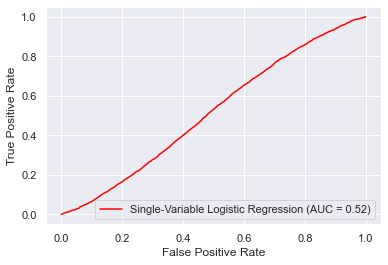

In [30]:
fpr, tpr, thresh = metrics.roc_curve(y_true=y, y_score=proba_solo, pos_label=1)
roc_auc = metrics.auc(x=fpr, y=tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Single-Variable Logistic Regression')

display.plot(color='red')
plt.show()

Below is the multiple-logistic regression I implemented, as well as an output displaying all of the associated $\beta$'s. Interpretations between this model and  the simple-logistic regression will be shown at the end.

In [33]:
X_mat = q4_predictors
y = gender[['gender_logistic']]

model_full = LogisticRegression().fit(X_mat,y)
score_full = model_full.score(X_mat,y)
proba_full = model_full.predict_proba(X_mat)[:,1]

full_coefs = model_full.coef_[0]

df_coefs = pd.DataFrame(full_coefs, columns=['full_coefs'])
df_coefs['labels'] = q4_predictors.columns

df_coefs = df_coefs.reindex(columns=['labels','full_coefs'])

print(f'Full Multiple Logisitic Regression Mean Accuracy: {score_full:.15f}')
df_coefs

Full Multiple Logisitic Regression Mean Accuracy: 0.819392077456594


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,labels,full_coefs
0,totalyearlycompensation,-7.342024e-07
1,yearsofexperience,-6.050415e-06
2,yearsatcompany,-3.376421e-06
3,Masters_Degree,-2.545995e-07
4,Bachelors_Degree,-8.777555e-07
5,Doctorate_Degree,-1.980391e-08
6,Highschool,-6.817728e-08
7,Race_Asian,-6.845451e-07
8,Race_White,-4.764589e-07
9,Race_Black,1.446226e-08


Again, while the accuracy is decently high, the ROC AUC is dismal, meaning that the model almost does no better at distinguishing positive and negative classes than simply guessing.

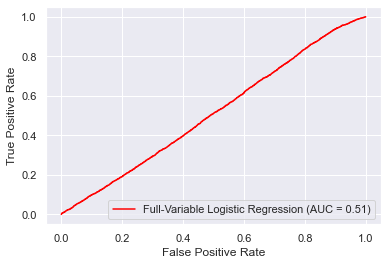

In [32]:
fpr, tpr, thresh = metrics.roc_curve(y_true=y, y_score=proba_full, pos_label=1)
roc_auc = metrics.auc(x=fpr, y=tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Full-Variable Logistic Regression')

display.plot(color='red')
plt.show()

### Question 4 Analysis & Interpretation

In this case, our "appreciable $\beta$" concerns that of the $\mathrm{ln}(\frac{p(x)}{1 - p(x)}) = \beta_{0} + \beta_{1} x$ term

* For the single-predictor logistic regression, $\beta = -6.889477463513102\mathrm{e}{-06}$ implies $e^{\beta} = 0.99999311054$, meaning an increase in **one dollar** `totalyearlycompensation` multiplies the odds of the corresponding employee associated with the salary by $0.99999311054$ (marginal effect) in our single-predictor logisitic regression using `totalyearlycompensation`.

* For the multiple-predictor logistic regression (acting as our method of controlling for other factors), $\beta = -7.342024\mathrm{e}{-07}$ implies $e^{\beta} = 0.99999926579$, meaning an increase in **one dollar** `totalyearlycompensation` multiplies the odds of the corresponding employee associated with the salary by $0.99999926579$ (marginal effect relative to other factoral changes in odds) in our multiple-predictor logisitic regression using `totalyearlycompensation` and others contained two cells above.

* In controlling for other variables, we see that the $e^{\beta}$ associated with `totalyearlycompensation` decreased (between the single-predictor and multiple-predictor models), meaning all other predictors held constant (controlled), there is less of a change in odds associated with `totalyearlycompensation` as not controlling for the variable.

Overall, there there does seem to be an appreciable difference in gender-pay gap from our analysis, but only through not controlling for other variables. The marginal effect is small on the unit-scale for both regressions, but on the scale of $50,000:

1. A \\$50,000 USD change in salary amounts to a $e^{50000 \beta_{s}} = 0.99999311054^{50000} = 0.70859284312$ multiplier on the odds of the target employee being Female (positive label) vs. Male (negative label), or in other words a $0.70859284312 - 1 = -0.29140715688$ change (decrease) in the odds of the label aforementioned.

2. A \\$50,000 USD change in salary amounts to a $e^{50000 \beta_{s}} = 0.99999926579^{50000} = 0.96395514698$ multiplier on the odds of the target employee being Female (positive label) vs. Male (negative label), or in other words a $0.96395514698 - 1 = -0.03604485302$ change (decrease) in the odds of the label aforementioned.

Either would be indicative of a reasonable difference in gender pay-gap, but controlling of other factors, the difference is much smaller.

# Question 5

Build a logistic regression model to see if you can predict high and low pay from years of relevant experience, age, height, SAT score and GPA, respectively.

## Answer

For this question, I will assume `totalyearlycompensation` as the "pay" variable requested in this analysis.

In order to compare high and low-pay from the aforementioned predictors, we carried out a median-split of the data by determining the median pay, marking all datapoints higher than the determined median with 1, and less than the median with 0. All values that equal the median is removed (and indexes of those entried kept). Then, the same index of datapoints obtained are removed from predictors as well.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

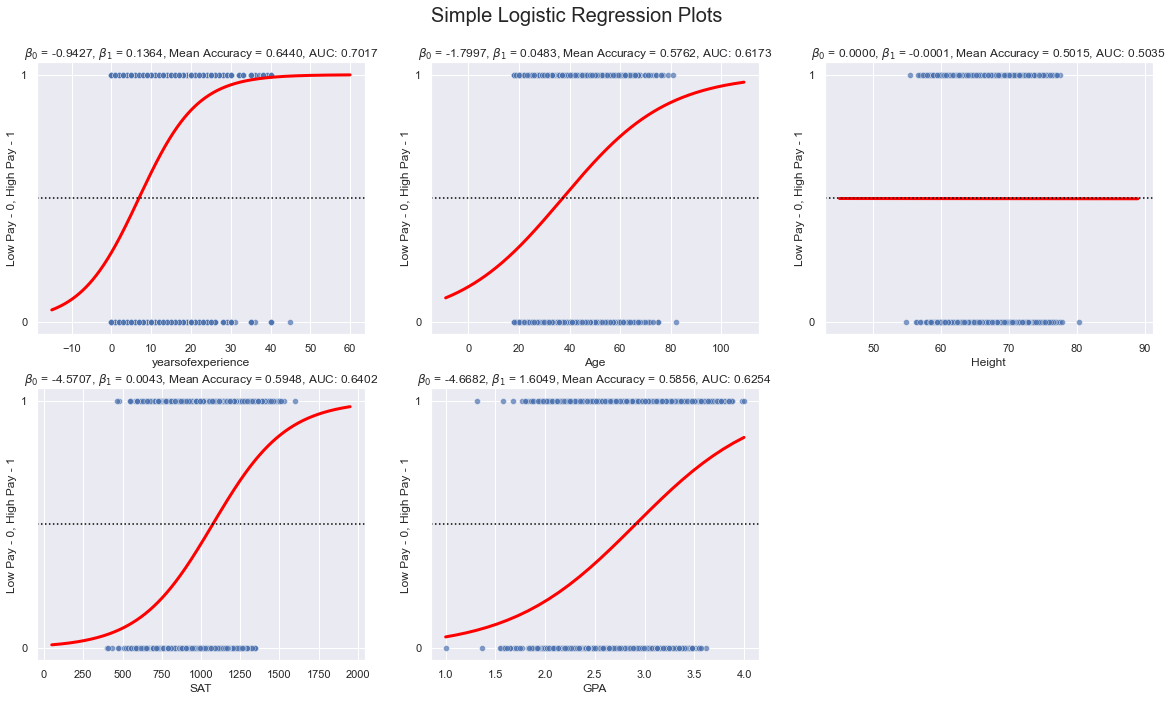

In [52]:
pay = df_dropna[['totalyearlycompensation']]
pay.loc['median_split'] = np.NaN
median_pay = pay['totalyearlycompensation'].median()

pay.loc[(pay['totalyearlycompensation'] < median_pay), 'median_split'] = 0
pay.loc[(pay['totalyearlycompensation'] > median_pay), 'median_split'] = 1

pay = pay.where(pay['totalyearlycompensation'] != median_pay).dropna()
drop_idx = pay.index
q5_predictors = df_dropna.loc[drop_idx, ['yearsofexperience','Age','Height','SAT','GPA']]

scatter_data = pd.concat([pay, q5_predictors], axis=1)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,11))
fig.suptitle('Simple Logistic Regression Plots', fontsize=20, y=0.95)
axs[1,2].set_visible(False)

for pred, ax in tqdm(zip(q5_predictors.columns, axs.ravel())):
    
    X = q5_predictors[[pred]]
    y = pay[['median_split']]

    model = LogisticRegression().fit(X,y)
    score = model.score(X,y)
    proba = model.predict_proba(X)[:,1]
    
    fpr, tpr, _ = metrics.roc_curve(y_true=y, y_score=proba, pos_label=1)
    auc = metrics.auc(x=fpr, y=tpr)
    
    x_min, x_max, x_std = int(X.min()), int(X.max()), int(X.std())
    minimum, maximum, step = x_min-3*x_std, x_max+3*x_std, (x_max-x_min)*10

    X1 = np.linspace(minimum, maximum, step)
    y1 = X1 * model.coef_ + model.intercept_
    sigmoid = expit(y1)

    sns.lineplot(X1, sigmoid.ravel(), color='red', linewidth=3, ax=ax)
    sns.scatterplot(x=pred, y='median_split', data=scatter_data, alpha=0.7, ax=ax)
    ax.axhline(y=0.5, xmin=0, xmax=1, linestyle='dotted', color='black')
    
    ax.set_xlabel(f'{pred}')
    ax.set_ylabel('Low Pay - 0, High Pay - 1')
    ax.set_yticks(np.array([0,1]))
    ax.set_title(f'$\\beta_{0}$ = {model.intercept_[0]:.4f}, $\\beta_{1}$ = {model.coef_[0][0]:.4f}, Mean Accuracy = {score:.4f}, AUC: {auc:.4f}')

Shown above, the built models are able to predict Low vs. High Pay to a degree. Looking at the accuracy for each model, we can see that (unsurprisingly) height is a very unpredictive factor in forecasting pay (based on the $R^{2}$ and ROC AUC).

However, others are better, able to obtain manageable accuracy (with `yearsofexperience` being the best for both $R^{2}$ and ROC as shown above).

# Question a

Is salary, height or age normally distributed? Does this surprise you? Why or why not?

## Answer

Results from visual inspection will be described below, as well as results of a performed Shapiro-Wilk test in order to show normality. I considered a KS-test, but as this statistic (the Shapiro-Wilk) is solely focused on normality, I found it to be of more use.

### Salary

The visual inspection made the distribution seem to be normally distributed, except for a small potential of a small bimodal shift on the left. This entire skew made the rest of the distribution rather abnormally distributed. Can't say this surprised me, given the correlation between `base salary` and `age` (shown below). Given the low p-value, we can say that we can reject the null hypothesis that the distribution of `basesalary` deviates from the normal.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


[Text(0.5, 1.0, 'Base Salary Distributions of Tech Employees'),
 Text(0.5, 0, 'Salary (USD) - W-statistic: 0.9211, p-value: 0.0000')]

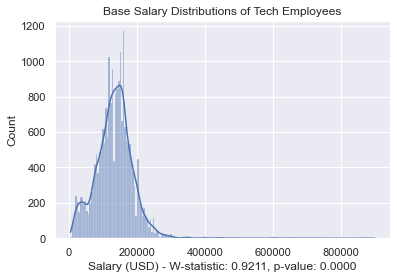

In [43]:
salary = df_dropna[['basesalary']]

hist = sns.histplot(salary,
                    x='basesalary',
                    kde=True)

stat, p_val = st.shapiro(salary)

hist.set(title='Base Salary Distributions of Tech Employees',
         xlabel=f'Salary (USD) - W-statistic: {stat:.4f}, p-value: {p_val:.4f}')

### Height

Visual inspection places the result as highly-normally distributed. I didn't expect much different: height is not a factor of consideration (that I know of at least) when considering candidates, and therefore should not create changes from an underlying distribution.

Further considering the population, from what I know height is highly correlated with gender. The average female height in the US is around 64 inches, and for a male around 69 inches. The results here perfectly represent the melded bi-modal distribution of height of any given underlying distribtuion.

The associated Shapiro-Wilk associates the test with a high p-value, implying the inability to reject the null hypothesis of `Height` deviating from a normal distribution.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


[Text(0.5, 1.0, 'Height Distribution of Tech Employees'),
 Text(0.5, 0, 'Height (Inches) - W-statistic: 1.0000, p-value: 0.9938')]

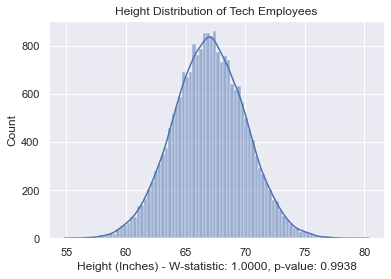

In [36]:
height = df_dropna[['Height']]

hist = sns.histplot(height,
                    x='Height',
                    kde=True)

stat, p_val = st.shapiro(height)

hist.set(title='Height Distribution of Tech Employees',
         xlabel=f'Height (Inches) - W-statistic: {stat:.4f}, p-value: {p_val:.4f}')

### Age

I can't say I did not expect this. This distribution is highly skewed positively, and with the recent booms in college education and widespread understanding of the earnings potential in the technology sector, more employees are younger than those who came before (older).

For our Shapiro-Wilk test, our p-value was again very small, implying that we can reject the null hypothesis in favor of the alternative, accepting that the underlying distribution for `Age` deviates from the normal.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


[Text(0.5, 1.0, 'Age Distribution of Tech Workers'),
 Text(0.5, 0, 'Age (Years) - W-statistic: 0.9875, p-value: 0.0000')]

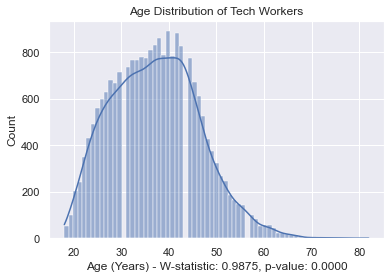

In [37]:
age = df_dropna[['Age']]

hist = sns.histplot(age,
                    x='Age',
                    kde=True)
hist.set(title='Age Distribution of Tech Workers')

stat, p_val = st.shapiro(age)

hist.set(title='Age Distribution of Tech Workers',
         xlabel=f'Age (Years) - W-statistic: {stat:.4f}, p-value: {p_val:.4f}')

# Question b

Tell  us  something  interesting  about  this  dataset  that  is  not  already  covered  by  the questions above and that is not obvious. 

## Answer

For this portion of the analysis, I will be showing plots of starting salaries across the FAANG firms, at the most recent time. This will be accomplished by utilizing the full-spectrum dataset, as long as the company is available, as well as the `totalyearlycompensation` and all related salary predictors.

Next, Walmart (notorious for being a low-paying tech company for a variety of roles) will be compared to all FAANG companies (and Microsoft) through running a KS-test and determining whether the `totalyearlycompensation` for each comes from the same underlying distribution.

### FAANG + Microsoft Plots

0it [00:00, ?it/s]C:\Users\sunny\AppData\Local\Temp/ipykernel_26488/1249517720.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_comp = df_FAANG[company].median(axis=0)['totalyearlycompensation']
C:\Users\sunny\AppData\Local\Temp/ipykernel_26488/1249517720.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_comp = df_FAANG[company].mean(axis=0)['totalyearlycompensation']
1it [00:01,  1.01s/it]C:\Users\sunny\AppData\Local\Temp/ipykernel_26488/1249517720.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns

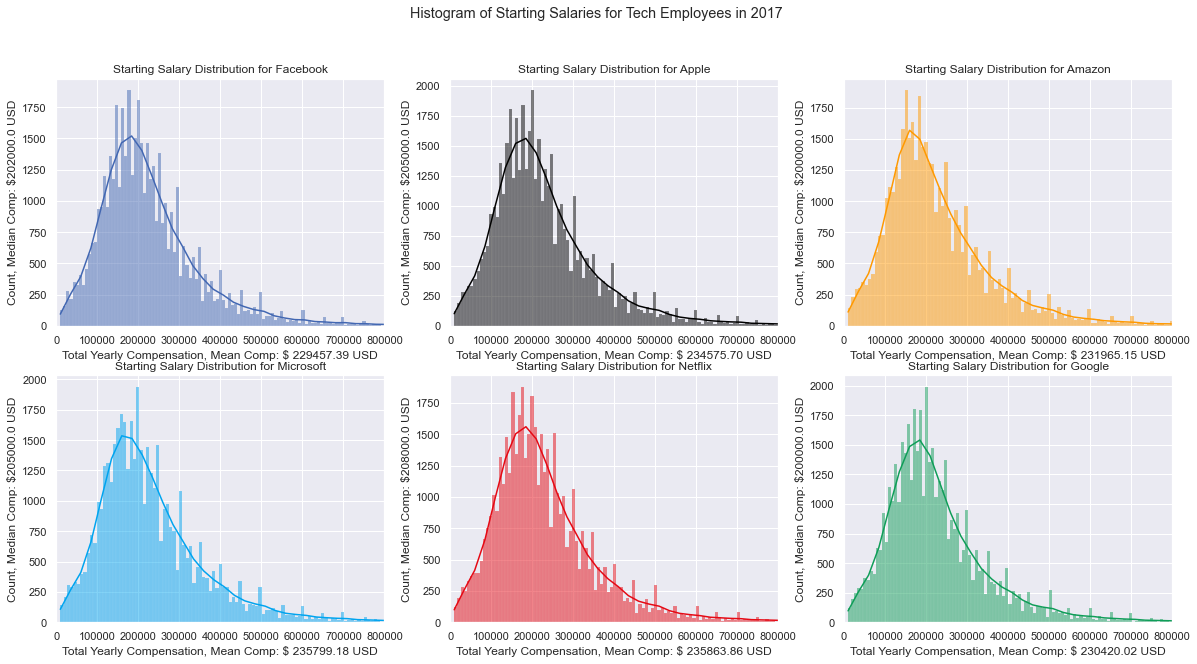

In [39]:
import re

df_starting = df[['totalyearlycompensation','yearsofexperience','company']]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig.suptitle('Histogram of Starting Salaries for Tech Employees in 2017')

colors = ['#4267B2','#000000','#FF9900','#00A4EF', '#E50914', '#0F9D58']
iter_color = iter(colors)

FAANG = ['Facebook', 'Apple', 'Amazon', 'Microsoft', 'Netflix', 'Google']

regex = ['facebook|fb', 'apple|aapl', 'amazon|amzn', 'microsoft|msft', 'netflix|nflx', 'google|goog|googl|goo']
iter_regex = iter(regex)

df_FAANG = {}
for company, ax in tqdm(zip(FAANG, axs.ravel())):
    df_FAANG[company] = df_starting[df_starting['company'].str.match(f'{next(iter_regex)}', flags=re.I) == True & (df_starting['yearsofexperience'] <= 2)]
    med_comp = df_FAANG[company].median(axis=0)['totalyearlycompensation']
    mean_comp = df_FAANG[company].mean(axis=0)['totalyearlycompensation']

    sns.histplot(df_FAANG[company],
                 x='totalyearlycompensation',                 
                 kde=True,
                 ax=ax,
                 color=next(iter_color))
    ax.set_xlim(0,0.8*1e6)

    ax.set_title(f'Starting Salary Distribution for {company}')
    ax.set_xlabel(f'Total Yearly Compensation, Mean Comp: \$ {mean_comp:.2f} USD')
    ax.set_ylabel(f'Count, Median Comp: \${med_comp} USD')

### Kolmorgorov-Smirnov

Next, using a KS-Test, I will determine whether any/all of these companies can be considered as competing for the same 'quality of talent' as other companies that I have heard (from my friends) are not as high esteemed in pay/accomodation. If the two samples do not come from the same underlying distribution, then it can be considered that the 'range of talent' looked for by these latter companies are different.

We will now compare Walmart with all other FAANG companies (and Microsoft) to see whether there is such a disparity in **starting salary**, or as we defined the `totalyearlycompensation` of workers with 2 (inclusive) or less years in `yeasofexperience`.

In [55]:
Walmart = df_starting[(df_starting['company'].str.match(pat='walmart',na=0,flags=re.I) == True) & (df_starting['yearsofexperience'] <= 2.0)]

In [56]:
KS_dict = {}

for company in FAANG:
    F_stat, p_value = st.kstest(rvs=df_FAANG[company]['totalyearlycompensation'], 
                                cdf=Walmart['totalyearlycompensation'], alternative='two-sided')

    KS_dict[company] = [F_stat, p_value]

for key, company in zip(KS_dict, FAANG):
    print(f'{company}, D-statistic: {KS_dict[key][0]:.4f}, p-value: {KS_dict[key][1]:.4f}')

Facebook, D-statistic: 0.4289, p-value: 0.0000
Apple, D-statistic: 0.4351, p-value: 0.0000
Amazon, D-statistic: 0.4105, p-value: 0.0000
Microsoft, D-statistic: 0.4351, p-value: 0.0000
Netflix, D-statistic: 0.4453, p-value: 0.0000
Google, D-statistic: 0.4233, p-value: 0.0000


The above KS-test statistics and p-values show the implausibility for the `totalyearlycompensation` distribution of Walmart tech employees to come from the same underlying distribution for any FAANG companies + Microsoft. The below graphs show this as well:

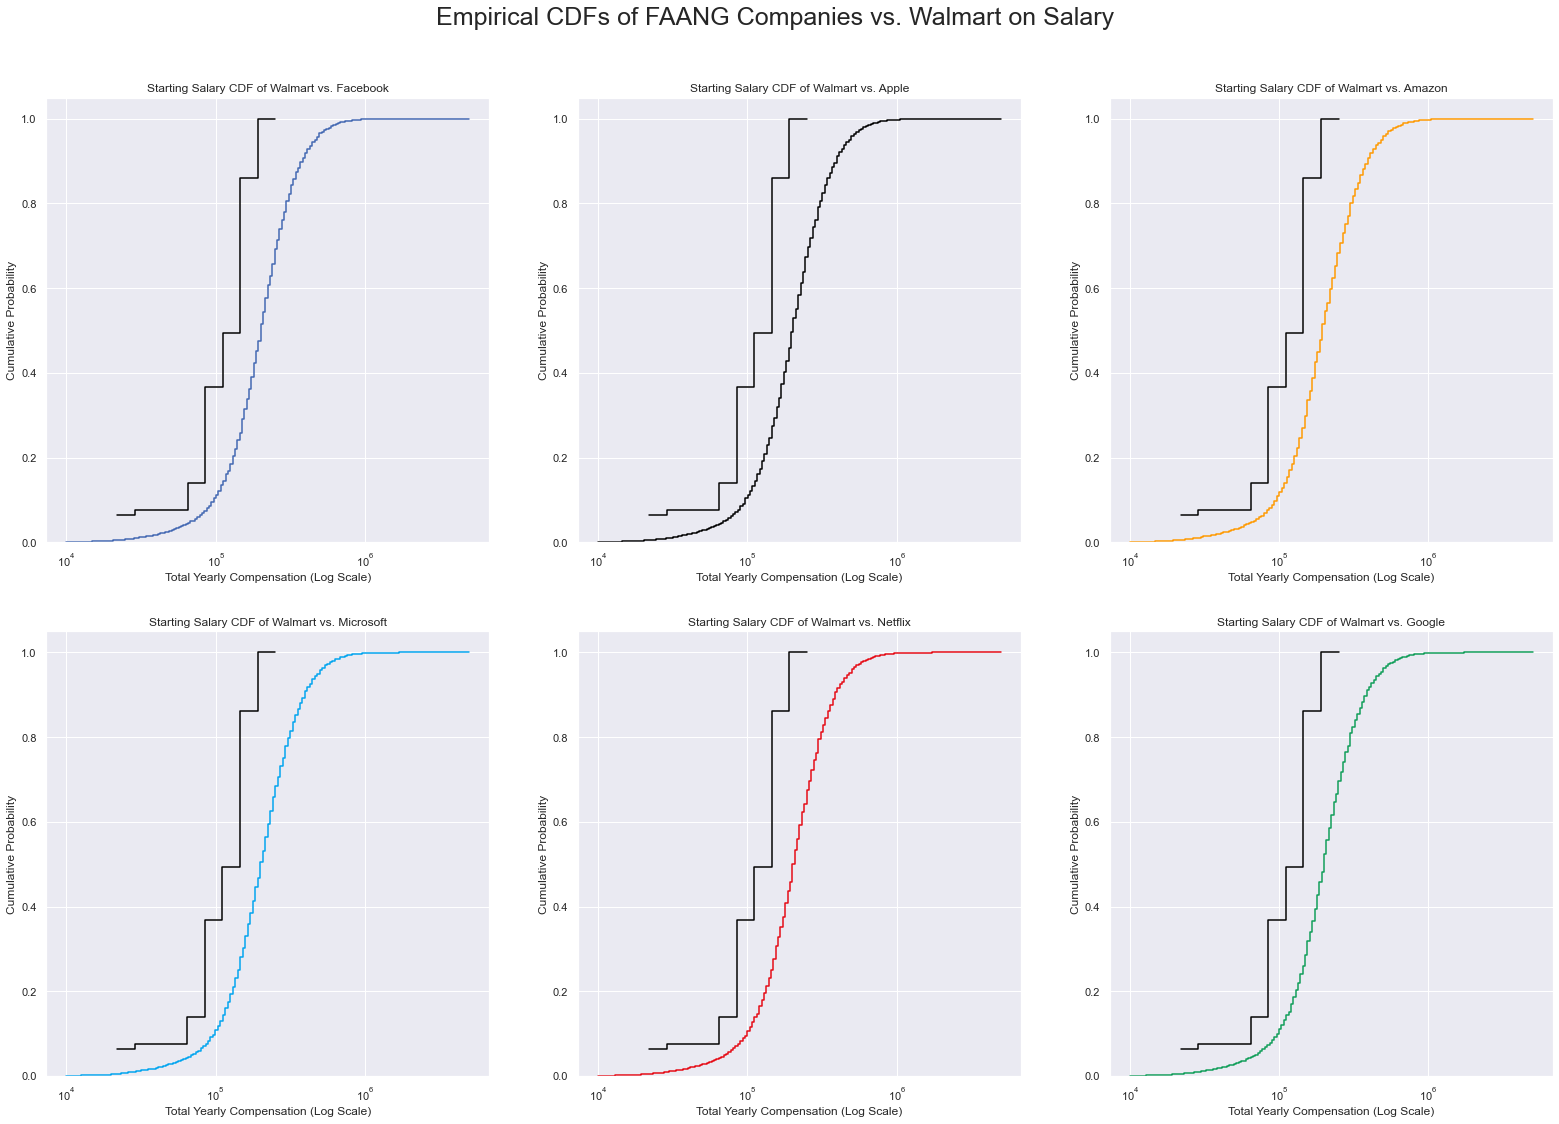

In [58]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,18))
axs = axs.flatten()
fig.suptitle('Empirical CDFs of FAANG Companies vs. Walmart on Salary', fontsize=25, y=0.95)

colors = ['#4267B2','#000000','#FF9900','#00A4EF', '#E50914', '#0F9D58']
iter_color = iter(colors)

for key, company, ax in zip(KS_dict, FAANG, axs):
    walmart_ecdf = ECDF(Walmart['totalyearlycompensation'])
    comp_ecdf = ECDF(df_FAANG[company]['totalyearlycompensation'])

    sns.histplot(data=Walmart, x='totalyearlycompensation', fill=False, 
                 element='step', cumulative=True, stat='density', color='black', ax=ax, log_scale=True)

    sns.histplot(data=df_FAANG[company], x='totalyearlycompensation', fill=False, element='step', 
                 cumulative=True, stat='density', color=next(iter_color), ax=ax, log_scale=True)

    ax.set_title(f'Starting Salary CDF of Walmart vs. {company}')
    ax.set_xlabel(f'Total Yearly Compensation (Log Scale)')
    ax.set_ylabel(f'Cumulative Probability')

    # ax.legend(loc='best')

# Citations

1. https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

2. https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

3. https://pubmed.ncbi.nlm.nih.gov/9044528/

4. https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d



